# 1. Se ganan más partidos como local que como visitante

In [1]:
#Importamos librerías necesarias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.DtypeWarning)

In [13]:
#importamos el csv
current_dir = os.getcwd()

parent_dir = os.path.abspath(os.path.join(current_dir, '..'))

csv_path = os.path.join(parent_dir, 'data', 'Matches.csv')

df = pd.read_csv(csv_path)

df


C:\Users\david\AppData\Local\Temp\ipykernel_14744\1773691398.py:8: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,...,MaxUnder25,HandiSize,HandiHome,HandiAway,C_LTH,C_LTA,C_VHD,C_VAD,C_HTB,C_PHB
0,F1,2000-07-28,NaN,Marseille,Troyes,1686.34,1586.57,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F1,2000-07-28,NaN,Paris SG,Strasbourg,1714.89,1642.51,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F2,2000-07-28,NaN,Wasquehal,Nancy,1465.08,1633.80,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F1,2000-07-29,NaN,Auxerre,Sedan,1635.58,1624.22,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F1,2000-07-29,NaN,Bordeaux,Metz,1734.34,1673.11,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230552,SP2,2025-06-01,17:30:00,Cartagena,Mirandes,1339.21,1544.15,3.0,6.0,7.0,...,2.40,1.8,1.95,1.85,0.0209,0.0118,0.0099,0.8084,0.1386,0.0104
230553,SP2,2025-06-01,17:30:00,Almeria,Tenerife,1544.16,1433.67,4.0,10.0,1.0,...,2.55,-1.8,1.80,2.00,0.3799,0.0630,0.2806,0.0160,0.2332,0.0274
230554,SP2,2025-06-01,17:30:00,La Coruna,Elche,1473.67,1569.98,0.0,3.0,3.0,...,2.63,1.3,1.78,2.03,0.0224,0.7482,0.0100,0.1201,0.0180,0.0813
230555,SP2,2025-06-01,17:30:00,Oviedo,Cadiz,1574.90,1525.76,7.0,13.0,6.0,...,1.51,-0.8,1.95,1.85,0.2070,0.2490,0.2334,0.0211,0.2634,0.0261


In [9]:
#observamos las columnas que tiene el df
df.columns

Index(['Division', 'MatchDate', 'MatchTime', 'HomeTeam', 'AwayTeam', 'HomeElo',
       'AwayElo', 'Form3Home', 'Form5Home', 'Form3Away', 'Form5Away', 'FTHome',
       'FTAway', 'FTResult', 'HTHome', 'HTAway', 'HTResult', 'HomeShots',
       'AwayShots', 'HomeTarget', 'AwayTarget', 'HomeFouls', 'AwayFouls',
       'HomeCorners', 'AwayCorners', 'HomeYellow', 'AwayYellow', 'HomeRed',
       'AwayRed', 'OddHome', 'OddDraw', 'OddAway', 'MaxHome', 'MaxDraw',
       'MaxAway', 'Over25', 'Under25', 'MaxOver25', 'MaxUnder25', 'HandiSize',
       'HandiHome', 'HandiAway', 'C_LTH', 'C_LTA', 'C_VHD', 'C_VAD', 'C_HTB',
       'C_PHB'],
      dtype='object')

In [4]:
#Eliminamos las últimas columnas que no aportan nada 
df = df.iloc[:,:-16]

In [5]:
#Eliminamos más columnas innecesarias
df = df.drop(columns=["MatchTime", "AwayElo","HomeElo","Form3Home","Form5Home","Form3Away","Form5Away"])

In [6]:
#Comprobamos que se han quedado las columnas que necesitamos
df.columns

Index(['Division', 'MatchDate', 'HomeTeam', 'AwayTeam', 'FTHome', 'FTAway',
       'FTResult', 'HTHome', 'HTAway', 'HTResult', 'HomeShots', 'AwayShots',
       'HomeTarget', 'AwayTarget', 'HomeFouls', 'AwayFouls', 'HomeCorners',
       'AwayCorners', 'HomeYellow', 'AwayYellow', 'HomeRed', 'AwayRed',
       'OddHome', 'OddDraw', 'OddAway'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230557 entries, 0 to 230556
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Division     230557 non-null  object 
 1   MatchDate    230557 non-null  object 
 2   HomeTeam     230557 non-null  object 
 3   AwayTeam     230557 non-null  object 
 4   FTHome       230554 non-null  float64
 5   FTAway       230554 non-null  float64
 6   FTResult     230554 non-null  object 
 7   HTHome       175977 non-null  float64
 8   HTAway       175977 non-null  float64
 9   HTResult     175977 non-null  object 
 10  HomeShots    114735 non-null  float64
 11  AwayShots    114738 non-null  float64
 12  HomeTarget   113929 non-null  float64
 13  AwayTarget   113932 non-null  float64
 14  HomeFouls    113973 non-null  float64
 15  AwayFouls    113973 non-null  float64
 16  HomeCorners  114363 non-null  float64
 17  AwayCorners  114363 non-null  float64
 18  HomeYellow   119298 non-

In [3]:
#Creamos la lista de las grandes ligas( Liga española, francesa, inglesa, italiana, alemana, holandesa y portuguesa)

grandes_ligas = ["SP1","F1", "E0","I1","D1","N1","P1"]


In [9]:
#creamos el df de las grandes ligas

df_grandes_ligas = df[df["Division"].isin(grandes_ligas)]

df_grandes_ligas

,Division,MatchDate,HomeTeam,AwayTeam,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,...,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway
0,F1,2000-07-28,Marseille,Troyes,3.0,1.0,H,2.0,1.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.65,3.30,4.30
1,F1,2000-07-28,Paris SG,Strasbourg,3.0,1.0,H,1.0,1.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.60,3.40,4.60
3,F1,2000-07-29,Auxerre,Sedan,0.0,1.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.70,3.30,3.90
4,F1,2000-07-29,Bordeaux,Metz,1.0,1.0,D,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.65,3.30,4.30
5,F1,2000-07-29,Guingamp,St Etienne,2.0,2.0,D,2.0,1.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.25,3.00,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230531,I1,2025-05-25,Lazio,Lecce,0.0,1.0,A,0.0,1.0,A,...,11.0,14.0,4.0,2.0,3.0,1.0,1.0,1.56,3.72,7.09
230532,I1,2025-05-25,Torino,Roma,0.0,2.0,A,0.0,1.0,A,...,11.0,2.0,1.0,1.0,1.0,0.0,0.0,5.74,4.16,1.57
230533,I1,2025-05-25,Udinese,Fiorentina,2.0,3.0,A,1.0,0.0,H,...,6.0,2.0,8.0,3.0,2.0,1.0,0.0,3.68,3.64,1.99
230534,I1,2025-05-25,Venezia,Juventus,2.0,3.0,A,1.0,2.0,A,...,18.0,6.0,6.0,1.0,2.0,0.0,0.0,5.80,4.23,1.55


In [10]:
#creamos el df del resto de ligas

df_resto_ligas = df[~df["Division"].isin(grandes_ligas)]

df_resto_ligas

,Division,MatchDate,HomeTeam,AwayTeam,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,...,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway
2,F2,2000-07-28,Wasquehal,Nancy,0.0,1.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,F2,2000-07-29,Ajaccio,Le Mans,1.0,0.0,H,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,F2,2000-07-29,Beauvais,Montpellier,1.0,3.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,F2,2000-07-29,Caen,Cannes,2.0,2.0,D,1.0,2.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,F2,2000-07-29,Chateauroux,Martigues,1.0,1.0,D,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230552,SP2,2025-06-01,Cartagena,Mirandes,1.0,3.0,A,1.0,2.0,A,...,8.0,4.0,6.0,3.0,1.0,0.0,0.0,12.33,6.19,1.20
230553,SP2,2025-06-01,Almeria,Tenerife,2.0,0.0,H,1.0,0.0,H,...,11.0,2.0,6.0,1.0,5.0,0.0,0.0,1.22,6.23,10.97
230554,SP2,2025-06-01,La Coruna,Elche,0.0,4.0,A,0.0,3.0,A,...,18.0,2.0,0.0,2.0,2.0,0.0,0.0,5.30,4.43,1.52
230555,SP2,2025-06-01,Oviedo,Cadiz,2.0,1.0,H,2.0,1.0,H,...,8.0,8.0,3.0,0.0,1.0,0.0,0.0,1.68,3.14,6.31


In [11]:
#Creamos una función que saca el porcentaje de victorias por cada liga o conjunto de ligas
def lista_porcentaje_HAD(ligas):
    resultados = ligas["FTResult"].value_counts()
    porcentaje_liga =[]
    for i in resultados:
        porcentaje_liga.append(round(i/ligas["FTResult"].count(),3))
    return pd.Series(porcentaje_liga)

In [12]:
#Sacamos el porcentaje de todas las ligas
porcentaje_total_HAD = lista_porcentaje_HAD(df)

print(porcentaje_total_HAD)

0    0.446
1    0.289
2    0.265
dtype: float64


In [13]:
#Sacamos el porcentaje de las grandes ligas

porcentaje_grandes_ligas_HAD = lista_porcentaje_HAD(df_grandes_ligas)

porcentaje_grandes_ligas_HAD 

0    0.458
1    0.287
2    0.255
dtype: float64

In [14]:
#Sacamos el porcentaje del resto de ligas
porcentaje_resto_ligas_HAD = lista_porcentaje_HAD(df_resto_ligas)
porcentaje_resto_ligas_HAD

0    0.442
1    0.289
2    0.268
dtype: float64

In [15]:
#Creamos el df

df_HAD = pd.concat([porcentaje_grandes_ligas_HAD,porcentaje_resto_ligas_HAD,porcentaje_total_HAD],axis=1)
df_HAD

,0,1,2
0,0.458,0.442,0.446
1,0.287,0.289,0.289
2,0.255,0.268,0.265


In [16]:
#Cambiamos el nombre de los índices
df_HAD = df_HAD.rename(columns={0: "Media grandes ligas", 1: "Media resto ligas", 2: "Media total"})
df_HAD.index= ["Victoria Local","Empate","Victoria Visitante"]
df_HAD

,Media grandes ligas,Media resto ligas,Media total
Victoria Local,0.458,0.442,0.446
Empate,0.287,0.289,0.289
Victoria Visitante,0.255,0.268,0.265


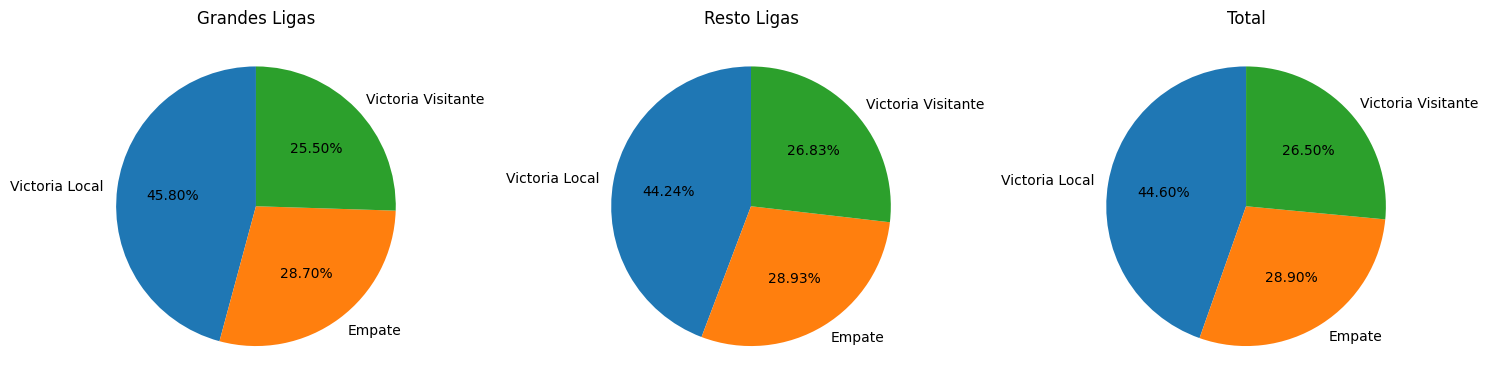

In [17]:
#Creamos el gráfico de barras
categorias = ["Victoria Local","Empate","Victoria Visitante"]
grandes_ligas = porcentaje_grandes_ligas_HAD
resto_ligas = porcentaje_resto_ligas_HAD
total = porcentaje_total_HAD


fig, axes = plt.subplots(1, 3, figsize=(15, 5))


axes[0].pie(grandes_ligas, labels=categorias, autopct='%1.2f%%', startangle=90)
axes[0].set_title('Grandes Ligas')


axes[1].pie(resto_ligas, labels=categorias, autopct='%1.2f%%', startangle=90)
axes[1].set_title('Resto Ligas')


axes[2].pie(total, labels=categorias, autopct='%1.2f%%', startangle=90)
axes[2].set_title('Total')


plt.tight_layout()
plt.show()

# Conclusión

Se puede observar en los gráficos que la diferencia de victorias local es un 20% superior en las grandes ligas mientras que en el resto de ligas es un poco inferior, alrededor de un 18%.

Por lo tanto la hipótesis de que se ganan más partidos como local que como visitante es **correcta**